In [17]:
from qiskit import QuantumCircuit
import qiskit
from qiskit.visualization import visualize_transition #import os  (check import os , not required mostly)
import numpy as np
import tkinter
from tkinter import LEFT, END, DISABLED, NORMAL
import warnings
from qiskit import execute
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from qiskit import Aer
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_bloch_vector
warnings.filterwarnings('ignore')

In [18]:
# Define the backend
backend = Aer.get_backend('statevector_simulator')

In [19]:
#Define Window
root = tkinter.Tk()
root.title('Qbit Rotation Simulator')

#set size
root.geometry('435x570')
root.resizable(1,1)

# #Define color and fonts
background = '#2c94c8'
buttons = '#834558'
special_buttons = '#bc3454'
button_font = ('Arial', 18)
display_font = ('Arial', 32)


In [20]:
# Inititalize the Quantum circuit
def initialize_circuit():
	global circuit
	circuit =QuantumCircuit(1)

initialize_circuit()
theta =0


In [21]:
#Define functions

def display_gate(gate_input):
    """
    Adds corresponding gate notation in the display to track all operations
    If the number of operation reaches 10, all gate buttons are disabled
    """
    #Insert the defined gate
    display.insert(END,gate_input)

    #Check if the number of operations has reached ten, if yes,
    #disable all the gate buttons
    input_gates = display.get()
    num_gates_pressed = len(input_gates)
    list_input_gates =list(input_gates)
    search_word = ["R","D"]
    count_double_valued_gates =[list_input_gates.count(i) for i in search_word]
    num_gates_pressed -= sum(count_double_valued_gates)
    if num_gates_pressed ==10:
        gates = [x_gate, y_gate, z_gate, Rx_gate, Ry_gate, Rz_gate, s_gate, sd_gate, t_gate, td_gate, hadamard]
        for gate in gates:
            gate.config(state = DISABLED)


In [22]:
def clear(circuit):
    """
    Clears the display!
    Reinitializes the quantum circuit for fresh calculations
    Checks if the gate button are disabled, if so , enables the buttons
    """
    #clear the display 
    display.delete(0,END)

    #reset the circuit to initial state |0>
    initialize_circuit()

    #checks if the button are disabled, if so , enables them
    if x_gate['state']== DISABLED:
        gates = [x_gate, y_gate, z_gate, Rx_gate, Ry_gate, Rz_gate, s_gate, sd_gate, t_gate, td_gate, hadamard]
        for gate in gates:
            gate.config(state=NORMAL)

In [23]:
#define function for about
def about():
    """
    Displays information about the Qubit Rotation Simulator.
    """

    info = tkinter.Tk()
    info.title('About')
    info.geometry('650x470')
    info.resizable(0, 0)

    text = tkinter.Text(info, height=20, width=20)

    # Create Label
    label = tkinter.Label(info, text="About Qubit Rotation Simulator")
    label.config(font=("Arial", 14))

    text_to_display = """
    Qubit Rotation Simulator
    
    Created by: Vivek, Tejdeep, Sagar
    Using: Qiskit, Python, Tkinter
    
    Gate Buttons and Qiskit Commands:
    
    X: Flip the state of the qubit
       Command: circuit.x(0)
    
    Y: Rotate the state vector about the Y-axis
       Command: circuit.y(0)
    
    Z: Flip the phase of the qubit by PI radians
       Command: circuit.z(0)
    
    Rx: Parameterized rotation about the X-axis
        Command: circuit.rx(angle, 0)
    
    Ry: Parameterized rotation about the Y-axis
        Command: circuit.ry(angle, 0)
    
    Rz: Parameterized rotation about the Z-axis
        Command: circuit.rz(angle, 0)
    
    S: Rotate the state vector about the Z-axis by PI/2 radians
       Command: circuit.s(0)
    
    T: Rotate the state vector about the Z-axis by PI/4 radians
       Command: circuit.t(0)
    
    Sd: Rotate the state vector about the Z-axis by -PI/2 radians
        Command: circuit.sdg(0)
    
    Td: Rotate the state vector about the Z-axis by -PI/4 radians
        Command: circuit.tdg(0)
    
    H: Create the state of superposition
       Command: circuit.h(0)
    
    Note: For Rx, Ry, and Rz gates, the rotation angle (theta) allowed range is [-2*PI, 2*PI].
    
    If a visualization error occurs, the application will close automatically,
    indicating that visualization of your circuit is not possible.
    
    Please note that only up to ten operations can be visualized at a time.
    """

    label.pack()
    text.pack(fill='both', expand=True)

    # Inserting the text
    text.insert(tkinter.END, text_to_display)

    # Run
    info.mainloop()

In [24]:
def visualize_circuit(circuit,window):
    """
    Visualizes the single qubit rotations corresponding to applied gates in a separate tkinter window.
    Handles any possible visualization error
    """
    try:
        visualize_transition(circuit=circuit)
    except qiskit.visualization.exceptions.VisualizationError:
        window.destroy()

In [25]:

def change_theta(num,window,circuit,key):
    """
    Changes the global variable theta and destroys the window
    """
    global theta
    theta= num*np.pi
    if key == 'x':
        circuit.rx(theta,0)
        theta=0
    elif key == 'y':
        circuit.ry(theta,0)
        theta=0
    else:
        circuit.rz(theta,0)
        theta=0
    window.destroy()

In [26]:
# ...
def display_info_circuit():
    info_text = '''
    Info about the Circuit Diagram:
    The circuit diagram represents the sequence of gates applied to the qubits in the quantum circuit.

    - Each box corresponds to a gate, and the lines represent the qubits.
    - The arrows indicate the direction of information flow.
    - The labels on the gates provide information about the gate type and parameters.

    Note: The circuit diagram provides a visual representation of the quantum circuit.

    '''

    info_window = tk.Toplevel()
    info_window.title('Info')
    info_label = tk.Label(info_window, text=info_text, padx=10, pady=10)
    info_label.pack()
# def display_circuit():
#     """
#     Display the circuit diagram
#     """
#     global circuit
#     print(circuit)
#     circuit_drawer(circuit, output='mpl').show()
def display_circuit():
    """
    Display the circuit diagram
    """
    global circuit
    
    # Create a new window for the circuit diagram
    window = tk.Toplevel()
    window.title('Circuit Diagram')
    
    # Create the circuit diagram using circuit_drawer
    circuit_diagram = circuit_drawer(circuit, output='mpl')
    
    # Create a canvas to display the circuit diagram
    canvas = FigureCanvasTkAgg(circuit_diagram, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    
    # Create the info button
    info_button = tk.Button(window, text="Info", command=display_info_circuit)
    info_button.pack(pady=10)


In [27]:
def display_info():
    info_text = '''
    Info about the plot:
    This plot represents the probability percentage or amplitude of each computational basis state in the quantum state.

    - Probability Percentage vs Basis: This bar chart shows the probability percentage of each basis state.
    - Amplitude vs Basis: This bar chart shows the amplitude (magnitude) of each basis state.

    Note: The state display below the plot provides the complex representation of each basis state.

    '''

    info_window = tk.Toplevel()
    info_window.title('Info')
    info_label = tk.Label(info_window, text=info_text, padx=10, pady=10)
    info_label.pack()

def display_state():
    """
    Display the probability percentage vs basis, amplitude vs basis, and the state information within the GUI
    """
    global backend
    
    # Execute the circuit and obtain the statevector
    job = execute(circuit, backend=backend, shots=1)
    result = job.result()
    statevector = result.get_statevector(circuit)
    
    # Compute the probability percentages
    probabilities = np.abs(statevector) ** 2
    
    # Create the basis labels for x-axis
    basis_labels = [f"|{i}>" for i in range(len(statevector))]
    
    # Create the probability percentage vs basis plot
    fig1 = plt.figure(figsize=(8, 6))
    plt.bar(range(len(statevector)), probabilities, color='steelblue')
    plt.xticks(range(len(statevector)), basis_labels, fontsize=10)
    plt.xlabel('Basis', fontsize=12)
    plt.ylabel('Probability Percentage', fontsize=12)
    plt.title('Probability Percentage vs Basis', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Create the amplitude vs basis plot
    fig2 = plt.figure(figsize=(8, 6))
    plt.bar(range(len(statevector)), np.abs(statevector), color='darkorange')
    plt.xticks(range(len(statevector)), basis_labels, fontsize=10)
    plt.xlabel('Basis', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title('Amplitude vs Basis', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Create the state display string
    state_text = "Qubit: "
    for i, probability in enumerate(probabilities):
        computational_basis_state = f"|{i}⟩"
        state_amplitude = f"({statevector[i].real:.3f}+{statevector[i].imag:.3f}j)"
        state_text += f"{state_amplitude}{computational_basis_state} "
        if i < len(probabilities) - 1:
            state_text += "+ "
    state_text = state_text.strip()  # Remove trailing whitespace
     # Insert the state display string into the text widget
    state_display.config(state='normal')
    state_display.delete('1.0', tkinter.END)  # Clear the text widget
    state_display.insert(tkinter.END, state_text + '\n')
    state_display.config(state='disabled')
    
    # Create Tkinter windows to display the plots and state information
    window1 = tk.Toplevel()
    canvas1 = FigureCanvasTkAgg(fig1, master=window1)
    canvas1.draw()
    canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    info_button1 = tk.Button(window1, text="Info", command=display_info)
    info_button1.pack(pady=10)

    window2 = tk.Toplevel()
    canvas2 = FigureCanvasTkAgg(fig2, master=window2)
    canvas2.draw()
    canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    info_button2 = tk.Button(window2, text="Info", command=display_info)
    info_button2.pack(pady=10)
    # Add some additional styling to the plots
    plt.tight_layout()
    fig1.patch.set_alpha(0)  # Make the figure background transparent
    fig2.patch.set_alpha(0)
    # state_window = tk.Toplevel()
    # state_display = tk.Text(state_window, height=5, width=50)
    # state_display.insert(tk.END, state_text)
    # state_display.pack()

    # state_window.mainloop()

In [28]:
def user_input(circuit,key):
    """
    Take the user input for rotation angle for parameterized
    Rotation gates Rx,Ry,Rz.
    """

    #Initialize and define the properties of window
    get_input = tkinter.Tk()
    get_input.title('Get theta')    
    get_input.geometry('540x315')
    get_input.resizable(0,0)

    val1= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='PI/4', command= lambda:change_theta(0.25,get_input,circuit,key ))
    val1.grid(row=0, column=0)

    val2= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='PI/2', command= lambda:change_theta(0.50,get_input,circuit,key ))
    val2.grid(row=0, column=1)

    val3= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='PI', command= lambda:change_theta(1.0,get_input,circuit,key ))
    val3.grid(row=0, column=2)

    val4= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='2*PI', command= lambda:change_theta(2.0,get_input,circuit,key ))
    val4.grid(row=0, column=3, sticky ='W')

    nval1= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-PI/4', command= lambda:change_theta(-0.25,get_input,circuit,key ))
    nval1.grid(row=1, column=0)

    nval2= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-PI/2', command= lambda:change_theta(-0.50,get_input,circuit,key ))
    nval2.grid(row=1, column=1)

    nval3= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-PI', command= lambda:change_theta(-1.0,get_input,circuit,key ))
    nval3.grid(row=1, column=2)

    nval4= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-2*PI', command= lambda:change_theta(-2.0,get_input,circuit,key ))
    nval4.grid(row=1, column=3, sticky ='W')

    text_object= tkinter.Text(get_input, height=20, width=20, bg="light cyan")

    note = """
    give the value for theta
    the value has the range [-2*PI,2*PI]
    """

    text_object.grid(sticky='WE',columnspan=4)
    text_object.insert(END,note)


    get_input.mainloop()

In [29]:
#Define Layout
#Define the  Frames
display_frame = tkinter.LabelFrame(root)
button_frame = tkinter.LabelFrame(root,bg='black')
display_frame.pack()
button_frame.pack(fill='both', expand=True)

#Define display frame layout
display = tkinter.Entry(display_frame, width=120, font=display_font, bg=background, borderwidth=10, justify="left")
display.pack(padx=3,pady=4)

# Create the state_display text widget
state_display = tkinter.Text(display_frame, width=80, height=2, font=button_font)
state_display.pack(padx=3, pady=4)

# Add a label for the state display
state_label = tkinter.Label(display_frame, text="State Display", font=button_font)
state_label.pack(pady=(10, 0))

# Define the layout for state_display and state_label
state_label.pack(pady=(10, 0))
state_display.pack(padx=3, pady=(0, 4))



In [30]:
#First Row of buttons
#First Row of buttons
x_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='X', command= lambda:[display_gate('x'),circuit.x(0)])
y_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Y', command= lambda:[display_gate('y'),circuit.y(0)])
z_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Z', command= lambda:[display_gate('z'),circuit.z(0)])

x_gate.grid(row=0,column=0,ipadx=45, pady=1,sticky='ew')
y_gate.grid(row=0,column=1,ipadx=45, pady=1,sticky='ew')
z_gate.grid(row=0,column=2,ipadx=53, pady=1, sticky='WE')

#Second Row of Buttons
Rx_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='RX', command = lambda:[display_gate('Rx'), user_input(circuit,'x')])
Ry_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='RY', command = lambda:[display_gate('Ry'), user_input(circuit,'y')])
Rz_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='RZ', command = lambda:[display_gate('Rz'), user_input(circuit,'z')])
Rx_gate.grid(row=1,column=0, columnspan=1, pady=1, sticky='WE')
Ry_gate.grid(row=1,column=1, columnspan=1, pady=1, sticky='WE')
Rz_gate.grid(row=1,column=2, columnspan=1, pady=1, sticky='WE')

#Third Row of buttons
s_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='S', command= lambda:[display_gate('S'),circuit.s(0)])
sd_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='SD', command= lambda:[display_gate('SD'),circuit.sdg(0)])
hadamard = tkinter.Button(button_frame, font=button_font, bg=buttons, text='H', command= lambda:[display_gate('h'),circuit.h(0)])
s_gate.grid(row=2,column=0, columnspan=1, pady=1, sticky='WE')
sd_gate.grid(row=2,column=1, pady=1, sticky='WE')
hadamard.grid(row=2,column=2, rowspan=2, pady=1, sticky='WENS')

#Fourth row of buttons
t_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='T', command= lambda:[display_gate('T'),circuit.t(0)])
td_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='TD', command= lambda:[display_gate('TD'),circuit.tdg(0)])
t_gate.grid(row=3,column=0, pady=1, sticky='WE')
td_gate.grid(row=3,column=1, pady=1, sticky='WE')


In [31]:
#Quit and Visualize button
quit = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Quit', command=root.destroy)
visualize = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Visualize', command =lambda:visualize_circuit(circuit,root))
quit.grid(row=4,column=0, columnspan=2,ipadx=5, pady=1, sticky='WE')
visualize.grid(row=4,column=2, columnspan=1,ipadx=8, pady=1, sticky='WE')

#Clear button
clear_button = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Clear', command= lambda:clear(circuit))
clear_button.grid(row=5,column=2, columnspan=1, sticky='WE')

#About button
about_button = tkinter.Button(button_frame, font=button_font, bg=buttons, text='About', command= lambda:about())
about_button.grid(row=5,column=0, columnspan=2, sticky='WE')

# ...

# Additional buttons and menu
display_circuit_button = tkinter.Button(button_frame, text="Circuit diagram", padx=10, pady=20, bg=buttons, font=button_font, command=lambda: display_circuit())
display_circuit_button.grid(row=6, column=0, columnspan=2, sticky='WENS')
# Create the info button for the circuit diagram
info_button_circuit = tk.Button(root, text="Circuit Info", command=display_info_circuit)
info_button_circuit.pack(pady=10)

display_state_button = tkinter.Button(button_frame, text="Display state", padx=10, pady=20, bg=buttons, font=button_font, command=lambda: display_state())
display_state_button.grid(row=6, column=2, columnspan=1, sticky='WENS')



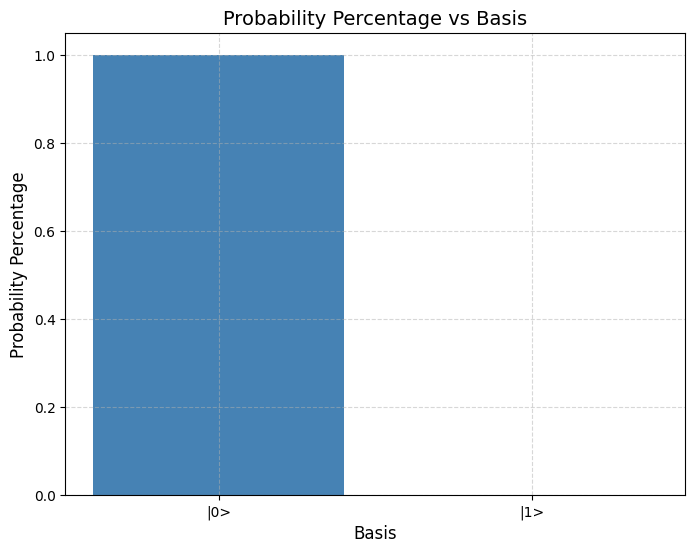

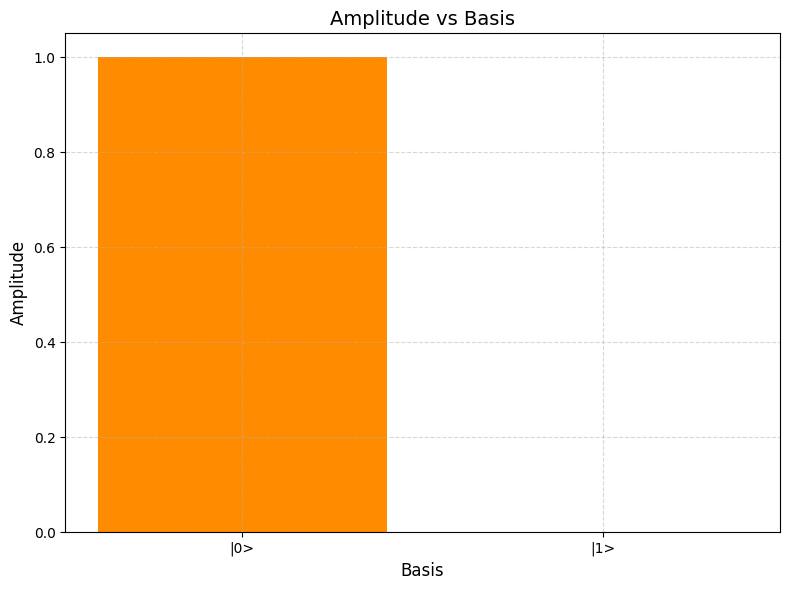

In [32]:
#Run main loop
root.mainloop()


In [ ]:
from qiskit import QuantumCircuit
import qiskit
from qiskit.visualization import visualize_transition #import os  (check import os , not required mostly)
import numpy as np
import tkinter
from tkinter import LEFT, END, DISABLED, NORMAL
import warnings
from qiskit import execute
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from qiskit import Aer
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_bloch_vector
from tkinter import messagebox
warnings.filterwarnings('ignore')


# Define the backend
backend = Aer.get_backend('statevector_simulator')

#Define Window
root = tkinter.Tk()
root.title('QuantumVizier')

#set size
root.geometry('440x565')
root.resizable(1,1)

# #Define color and fonts
background = '#2c94c8'
buttons = '#66C2FF'
special_buttons = '#bc3454'
button_font = ('Verdana', 18)
display_font = ('Arial', 32)

# Inititalize the Quantum circuit
def initialize_circuit():
	global circuit
	circuit =QuantumCircuit(1)

initialize_circuit()
theta =0

	

#Define functions

def display_gate(gate_input):
    """
    Adds corresponding gate notation in the display to track all operations
    If the number of operation reaches 10, all gate buttons are disabled
    """
    #Insert the defined gate
    display.insert(END,gate_input)

    #Check if the number of operations has reached ten, if yes,
    #disable all the gate buttons
    input_gates = display.get()
    num_gates_pressed = len(input_gates)
    list_input_gates =list(input_gates)
    search_word = ["R","D"]
    count_double_valued_gates =[list_input_gates.count(i) for i in search_word]
    num_gates_pressed -= sum(count_double_valued_gates)
    if num_gates_pressed ==10:
        gates = [x_gate, y_gate, z_gate, Rx_gate, Ry_gate, Rz_gate, s_gate, sd_gate, t_gate, td_gate, hadamard]
        for gate in gates:
            gate.config(state = DISABLED)


def clear(circuit):
    """
    Clears the display!
    Reinitializes the quantum circuit for fresh calculations
    Checks if the gate button are disabled, if so , enables the buttons
    """
    #clear the display 
    display.delete(0,END)

    #reset the circuit to initial state |0>
    initialize_circuit()

    #checks if the button are disabled, if so , enables them
    if x_gate['state']== DISABLED:
        gates = [x_gate, y_gate, z_gate, Rx_gate, Ry_gate, Rz_gate, s_gate, sd_gate, t_gate, td_gate, hadamard]
        for gate in gates:
            gate.config(state=NORMAL)

#define function for about
def about():
    """
    Displays information about the Qubit Rotation Simulator.
    """

    info = tkinter.Tk()
    info.title('About')
    info.geometry('650x470')
    info.resizable(0, 0)

    text = tkinter.Text(info, height=20, width=20)

    # Create Label
    label = tkinter.Label(info, text="QuantumVizier: Visualizing the Quantum World")
    label.config(font=("Arial", 14))

    text_to_display = """
    Qubit Rotation Simulator
    
    Created by: Vivek, Tejdeep, Sagar
    Using: Qiskit, Python, Tkinter
    
    The Bloch Sphere is a visual representation of the state space of a single 
    qubit in quantum computing. It provides a geometric representation of the 
    possible states a qubit can be in.
    
    Gate Buttons and Qiskit Commands:
    
    X: Flip the state of the qubit
       Command: circuit.x(0)
    
    Y: Rotate the state vector about the Y-axis
       Command: circuit.y(0)
    
    Z: Flip the phase of the qubit by PI radians
       Command: circuit.z(0)
    
    Rx: Parameterized rotation about the X-axis
        Command: circuit.rx(angle, 0)
    
    Ry: Parameterized rotation about the Y-axis
        Command: circuit.ry(angle, 0)
    
    Rz: Parameterized rotation about the Z-axis
        Command: circuit.rz(angle, 0)
    
    S: Rotate the state vector about the Z-axis by PI/2 radians
       Command: circuit.s(0)
    
    T: Rotate the state vector about the Z-axis by PI/4 radians
       Command: circuit.t(0)
    
    Sd: Rotate the state vector about the Z-axis by -PI/2 radians
        Command: circuit.sdg(0)
    
    Td: Rotate the state vector about the Z-axis by -PI/4 radians
        Command: circuit.tdg(0)
    
    H: Create the state of superposition
       Command: circuit.h(0)
    
    Note: For Rx, Ry, and Rz gates, the rotation angle (theta) allowed range is [-2*PI, 2*PI].
    
    If a visualization error occurs, the application will close automatically,
    indicating that visualization of your circuit is not possible.
    
    Please note that only up to ten operations can be visualized at a time.
    """

    label.pack()
    text.pack(fill='both', expand=True)

    # Inserting the text
    text.insert(tkinter.END, text_to_display)

    # Run
    info.mainloop()



from qiskit.visualization import plot_bloch_multivector
def visualize_circuit(circuit, window):
    """
    Visualizes the multi-qubit rotations corresponding to applied gates in a separate tkinter window.
    Handles any possible visualization error and provides informative error messages.
    """
    try:
        visualize_multiqubit(circuit=circuit)
    except qiskit.visualization.exceptions.VisualizationError as e:
        error_message = f"An error occurred during visualization: {str(e)}"
        # Display the error message to the user using messagebox.showerror
        messagebox.showerror("Visualization Error", error_message)
        # Destroy the window or perform any necessary cleanup
        window.destroy()




def change_theta(num,window,circuit,key):
    """
    Changes the global variable theta and destroys the window
    """
    global theta
    theta= num*np.pi
    if key == 'x':
        circuit.rx(theta,0)
        theta=0
    elif key == 'y':
        circuit.ry(theta,0)
        theta=0
    else:
        circuit.rz(theta,0)
        theta=0
    window.destroy()


# ...
def display_info_circuit():
    info_text = '''
    Info about the Circuit Diagram:
    The circuit diagram represents the sequence of gates applied to the qubits in the quantum circuit.

    - Each box corresponds to a gate, and the lines represent the qubits.
    - The arrows indicate the direction of information flow.
    - The labels on the gates provide information about the gate type and parameters.

    Note: The circuit diagram provides a visual representation of the quantum circuit.

    '''

    info_window = tk.Toplevel()
    info_window.title('Info')
    info_label = tk.Label(info_window, text=info_text, padx=10, pady=10)
    info_label.pack()
# def display_circuit():
#     """
#     Display the circuit diagram
#     """
#     global circuit
#     print(circuit)
#     circuit_drawer(circuit, output='mpl').show()
def display_circuit():
    """
    Display the circuit diagram
    """
    global circuit
    
    # Create a new window for the circuit diagram
    window = tk.Toplevel()
    window.title('Circuit Diagram')
    
    # Create the circuit diagram using circuit_drawer
    circuit_diagram = circuit_drawer(circuit, output='mpl')
    
    # Create a canvas to display the circuit diagram
    canvas = FigureCanvasTkAgg(circuit_diagram, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    
    # Create the info button
    info_button = tk.Button(window, text="Info", command=display_info_circuit)
    info_button.pack(pady=10)





def display_info():
    info_text = '''
    Info about the plot:
    This plot represents the probability percentage or amplitude of each computational basis state in the quantum state.

    - Probability Percentage vs Basis: This bar chart shows the probability percentage of each basis state.
    - Amplitude vs Basis: This bar chart shows the amplitude (magnitude) of each basis state.

    Note: The state display below the plot provides the complex representation of each basis state.

    '''

    info_window = tk.Toplevel()
    info_window.title('Info')
    info_label = tk.Label(info_window, text=info_text, padx=10, pady=10)
    info_label.pack()

def display_state():
    """
    Display the probability percentage vs basis, amplitude vs basis, and the state information within the GUI
    """
    global backend
    
    # Execute the circuit and obtain the statevector
    job = execute(circuit, backend=backend, shots=1)
    result = job.result()
    statevector = result.get_statevector(circuit)
    
    # Compute the probability percentages
    probabilities = np.abs(statevector) ** 2
    
    # Create the basis labels for x-axis
    basis_labels = [f"|{i}>" for i in range(len(statevector))]
    
    # Create the probability percentage vs basis plot
    fig1 = plt.figure(figsize=(8, 6))
    plt.bar(range(len(statevector)), probabilities, color='steelblue')
    plt.xticks(range(len(statevector)), basis_labels, fontsize=10)
    plt.xlabel('Basis', fontsize=12)
    plt.ylabel('Probability Percentage', fontsize=12)
    plt.title('Probability Percentage vs Basis', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Create the amplitude vs basis plot
    fig2 = plt.figure(figsize=(8, 6))
    plt.bar(range(len(statevector)), np.abs(statevector), color='darkorange')
    plt.xticks(range(len(statevector)), basis_labels, fontsize=10)
    plt.xlabel('Basis', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title('Amplitude vs Basis', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Create the state display string
    state_text = "Qubit: "
    for i, probability in enumerate(probabilities):
        computational_basis_state = f"|{i}⟩"
        state_amplitude = f"({statevector[i].real:.3f}+{statevector[i].imag:.3f}j)"
        state_text += f"{state_amplitude}{computational_basis_state} "
        if i < len(probabilities) - 1:
            state_text += "+ "
    state_text = state_text.strip()  # Remove trailing whitespace
     # Insert the state display string into the text widget
    state_display.config(state='normal')
    state_display.delete('1.0', tkinter.END)  # Clear the text widget
    state_display.insert(tkinter.END, state_text + '\n')
    state_display.config(state='disabled')
    
    # Create Tkinter windows to display the plots and state information
    window1 = tk.Toplevel()
    canvas1 = FigureCanvasTkAgg(fig1, master=window1)
    canvas1.draw()
    canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    info_button1 = tk.Button(window1, text="Info", command=display_info)
    info_button1.pack(pady=10)

    window2 = tk.Toplevel()
    canvas2 = FigureCanvasTkAgg(fig2, master=window2)
    canvas2.draw()
    canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    info_button2 = tk.Button(window2, text="Info", command=display_info)
    info_button2.pack(pady=10)
    # Add some additional styling to the plots
    plt.tight_layout()
    fig1.patch.set_alpha(0)  # Make the figure background transparent
    fig2.patch.set_alpha(0)
    # state_window = tk.Toplevel()
    # state_display = tk.Text(state_window, height=5, width=50)
    # state_display.insert(tk.END, state_text)
    # state_display.pack()

    # state_window.mainloop()
           

    
     



def user_input(circuit,key):
    """
    Take the user input for rotation angle for parameterized
    Rotation gates Rx,Ry,Rz.
    """

    #Initialize and define the properties of window
    get_input = tkinter.Tk()
    get_input.title('Get theta')    
    get_input.geometry('540x315')
    get_input.resizable(0,0)

    val1= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='PI/4', command= lambda:change_theta(0.25,get_input,circuit,key ))
    val1.grid(row=0, column=0)

    val2= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='PI/2', command= lambda:change_theta(0.50,get_input,circuit,key ))
    val2.grid(row=0, column=1)

    val3= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='PI', command= lambda:change_theta(1.0,get_input,circuit,key ))
    val3.grid(row=0, column=2)

    val4= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='2*PI', command= lambda:change_theta(2.0,get_input,circuit,key ))
    val4.grid(row=0, column=3, sticky ='W')

    nval1= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-PI/4', command= lambda:change_theta(-0.25,get_input,circuit,key ))
    nval1.grid(row=1, column=0)

    nval2= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-PI/2', command= lambda:change_theta(-0.50,get_input,circuit,key ))
    nval2.grid(row=1, column=1)

    nval3= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-PI', command= lambda:change_theta(-1.0,get_input,circuit,key ))
    nval3.grid(row=1, column=2)

    nval4= tkinter.Button(get_input, height=2, width=10, bg= buttons, font=("Arial,10") ,text='-2*PI', command= lambda:change_theta(-2.0,get_input,circuit,key ))
    nval4.grid(row=1, column=3, sticky ='W')

    text_object= tkinter.Text(get_input, height=20, width=20, bg="light cyan")

    note = """
    give the value for theta
    the value has the range [-2*PI,2*PI]
    """

    text_object.grid(sticky='WE',columnspan=4)
    text_object.insert(END,note)


    get_input.mainloop()

#Define Layout
#Define the  Frames
display_frame = tkinter.LabelFrame(root)
button_frame = tkinter.LabelFrame(root,bg='black')
display_frame.pack()
button_frame.pack(fill='both', expand=True)

#Define display frame layout
display = tkinter.Entry(display_frame, width=120, font=display_font, bg=background, borderwidth=10, justify="left")
display.pack(padx=3,pady=4)

# Create the state_display text widget
state_display = tkinter.Text(display_frame, width=80, height=2, font=button_font)
state_display.pack(padx=3, pady=4)

# Add a label for the state display
state_label = tkinter.Label(display_frame, text="State Display", font=button_font)
state_label.pack(pady=(10, 0))

# Define the layout for state_display and state_label
state_label.pack(pady=(10, 0))
state_display.pack(padx=3, pady=(0, 4))


#First Row of buttons
#First Row of buttons
x_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='X', command= lambda:[display_gate('x'),circuit.x(0)])
y_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Y', command= lambda:[display_gate('y'),circuit.y(0)])
z_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Z', command= lambda:[display_gate('z'),circuit.z(0)])

x_gate.grid(row=0,column=0,ipadx=45, pady=1,sticky='ew')
y_gate.grid(row=0,column=1,ipadx=45, pady=1,sticky='ew')
z_gate.grid(row=0,column=2,ipadx=53, pady=1, sticky='WE')

#Second Row of Buttons
Rx_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='RX', command = lambda:[display_gate('Rx'), user_input(circuit,'x')])
Ry_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='RY', command = lambda:[display_gate('Ry'), user_input(circuit,'y')])
Rz_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='RZ', command = lambda:[display_gate('Rz'), user_input(circuit,'z')])
Rx_gate.grid(row=1,column=0, columnspan=1, pady=1, sticky='WE')
Ry_gate.grid(row=1,column=1, columnspan=1, pady=1, sticky='WE')
Rz_gate.grid(row=1,column=2, columnspan=1, pady=1, sticky='WE')

#Third Row of buttons
s_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='S', command= lambda:[display_gate('S'),circuit.s(0)])
sd_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='SD', command= lambda:[display_gate('SD'),circuit.sdg(0)])
hadamard = tkinter.Button(button_frame, font=button_font, bg=buttons, text='H', command= lambda:[display_gate('h'),circuit.h(0)])
s_gate.grid(row=2,column=0, columnspan=1, pady=1, sticky='WE')
sd_gate.grid(row=2,column=1, pady=1, sticky='WE')
hadamard.grid(row=2,column=2, rowspan=2, pady=1, sticky='WENS')

#Fourth row of buttons
t_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='T', command= lambda:[display_gate('T'),circuit.t(0)])
td_gate = tkinter.Button(button_frame, font=button_font, bg=buttons, text='TD', command= lambda:[display_gate('TD'),circuit.tdg(0)])
t_gate.grid(row=3,column=0, pady=1, sticky='WE')
td_gate.grid(row=3,column=1, pady=1, sticky='WE')

#Quit and Visualize button
quit = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Quit', command=root.destroy)
visualize = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Visualize', command =lambda:visualize_circuit(circuit,root))
quit.grid(row=4,column=0, columnspan=2,ipadx=5, pady=1, sticky='WE')
visualize.grid(row=4,column=2, columnspan=1,ipadx=8, pady=1, sticky='WE')

#Clear button
clear_button = tkinter.Button(button_frame, font=button_font, bg=buttons, text='Clear', command= lambda:clear(circuit))
clear_button.grid(row=6,column=2, columnspan=1, sticky='WE')

#About button
about_button = tkinter.Button(button_frame, font=button_font, bg=buttons, text='About', command= lambda:about())
about_button.grid(row=6,column=0, columnspan=2, sticky='WE')

# ...

# Additional buttons and menu
display_circuit_button = tkinter.Button(button_frame, text="Circuit diagram",  bg=buttons, font=button_font, command=lambda: display_circuit())
display_circuit_button.grid(row=5, column=0, columnspan=2, sticky='WENS')
# Create the info button for the circuit diagram
# info_button_circuit = tk.Button(root, text="Circuit Info", command=display_info_circuit)
# info_button_circuit.pack(pady=10)

display_state_button = tkinter.Button(button_frame, text="Display state",  bg=buttons, font=button_font, command=lambda: display_state())
display_state_button.grid(row=5, column=2, columnspan=1, sticky='WENS')


#Run main loop
root.mainloop()
